In [22]:
import os
import geopandas as gpd
import pandas as pd
import sodapy
from sodapy import Socrata
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
%matplotlib inline

# URL Filtering of Chicago 311 calls

In [3]:
url_req = 'https://data.cityofchicago.org/resource/v6vf-nfxy.geojson?$limit=1000000\
&$select=date_extract_y(created_date)%20as%20year,date_extract_m(created_date)%20as%20month\
,community_area,ward,location,street_name,street_type,zip_code,duplicate&$where=created_date\
%20between%20%272018-01-01T00:00:00%27%20and%20%272020-05-01T00:00:00%27\
%20and%20sr_type%20like%20%27Graffiti%20Removal%20Request%27'
request = gpd.read_file(url_req)

# URL Code for Chicago communities

In [4]:
url_comm = 'https://data.cityofchicago.org/resource/igwz-8jzy.geojson?$limit=1000000'
community = gpd.read_file(url_comm)

# DataFrame merging

In [5]:
chicago = pd.merge(request, community, left_on = "community_area", right_on = "area_numbe")

# Community area with the most graffiti complaints during this URL filtered time period.

In [6]:
graff_comm = chicago.groupby(['community']).agg({'community':'count'})
graff_comm.columns = ['total_count']
graff_comm

,total_count
community,
ALBANY PARK,4186
ARCHER HEIGHTS,3080
ARMOUR SQUARE,977
ASHBURN,1156
AUBURN GRESHAM,291
...,...
WEST LAWN,1287
WEST PULLMAN,188
WEST RIDGE,2352


In [7]:
highest_comm = graff_comm.loc[graff_comm.total_count == graff_comm.total_count.max()]
highest_comm

,total_count
community,
WEST TOWN,11467


### West Town was the community area that had the most graffiti complaints during the time period

# Month where graffiti complaints are most frequent.

In [8]:
graff_month = chicago.groupby(['month']).agg({'month':'count'})
graff_month.columns = ['total_count']
graff_month

,total_count
month,
1,14839
10,16418
11,15546
12,13289
2,11700
3,12858
4,12277
5,4612
6,8116


In [9]:
highest_month = graff_month.loc[graff_month.total_count == graff_month.total_count.max()]
highest_month

,total_count
month,
8,19399


### The month where graffiti complaints are most frequent is in the 8th month, or August

# Number of complaints in each community that are duplicates.

In [10]:
chicago_dup = request.loc[request['duplicate'] == True]
chicago_dup

,zip_code,duplicate,year,street_name,ward,street_type,community_area,month,geometry
1,60623,True,2020,AVERS,22,AVE,30,1,POINT (-87.72049 41.83867)
36,60608,True,2020,CERMAK,25,RD,31,4,POINT (-87.66154 41.85317)
51,60639,True,2020,WRIGHTWOOD,31,AVE,19,4,POINT (-87.75926 41.92796)
63,60616,True,2020,PRAIRIE,4,AVE,35,4,POINT (-87.62031 41.83168)
82,60632,True,2020,ROCKWELL,15,ST,58,4,POINT (-87.68930 41.80846)
...,...,...,...,...,...,...,...,...,...
165210,60608,True,2019,BLUE ISLAND,25,AVE,31,6,POINT (-87.68482 41.84546)
165282,60647,True,2019,TALMAN,1,AVE,22,6,POINT (-87.69346 41.92392)
165385,60634,True,2019,BELMONT,36,AVE,18,6,POINT (-87.79798 41.93797)
165698,60623,True,2018,TRUMBULL,22,AVE,30,12,POINT (-87.71100 41.85000)


In [11]:
chicago_dup_comm = pd.merge(chicago_dup, community, left_on = 'community_area', right_on = 'area_numbe')
chicago_dup_comm

,zip_code,duplicate,year,street_name,ward,street_type,community_area,month,geometry_x,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry_y
0,60623,True,2020,AVERS,22,AVE,30,1,POINT (-87.72049 41.83867),SOUTH LAWNDALE,0,127998297.867,0,30,30,0,0,49904.0452102,"MULTIPOLYGON (((-87.68740 41.83480, -87.68796 ..."
1,60608,True,2020,CALIFORNIA,12,AVE,30,4,POINT (-87.69552 41.84544),SOUTH LAWNDALE,0,127998297.867,0,30,30,0,0,49904.0452102,"MULTIPOLYGON (((-87.68740 41.83480, -87.68796 ..."
2,60623,True,2020,HAMLIN,22,AVE,30,4,POINT (-87.72009 41.84998),SOUTH LAWNDALE,0,127998297.867,0,30,30,0,0,49904.0452102,"MULTIPOLYGON (((-87.68740 41.83480, -87.68796 ..."
3,60608,True,2020,CALIFORNIA,12,AVE,30,4,POINT (-87.69526 41.85470),SOUTH LAWNDALE,0,127998297.867,0,30,30,0,0,49904.0452102,"MULTIPOLYGON (((-87.68740 41.83480, -87.68796 ..."
4,60608,True,2020,21ST,24,PL,30,4,POINT (-87.69074 41.85270),SOUTH LAWNDALE,0,127998297.867,0,30,30,0,0,49904.0452102,"MULTIPOLYGON (((-87.68740 41.83480, -87.68796 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,60609,True,2019,47TH,3,ST,37,10,POINT (-87.63492 41.80926),FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
5418,60615,True,2019,LAKE SHORE,5,DR,39,9,POINT (-87.58372 41.80259),KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
5419,60615,True,2019,LAKE SHORE,5,DR,39,7,POINT (-87.58175 41.80247),KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
5420,60619,True,2019,90TH,9,ST,44,7,POINT (-87.62151 41.73114),CHATHAM,0,82320670.3112,0,44,44,0,0,42006.9450094,"MULTIPOLYGON (((-87.59535 41.73678, -87.59539 ..."


In [12]:
dup = chicago_dup_comm.groupby(['community']).agg({'community':'count'})
dup.columns = ['total_count']
dup

,total_count
community,
ALBANY PARK,150
ARCHER HEIGHTS,173
ARMOUR SQUARE,14
ASHBURN,106
AUBURN GRESHAM,2
...,...
WEST LAWN,46
WEST PULLMAN,6
WEST RIDGE,61


# Number of complaints in each community that are on the same street.

In [13]:
chicago['overall_street'] = chicago['street_name'] + ' ' + chicago['street_type']
chicago

,zip_code,duplicate,year,street_name,ward,street_type,community_area,month,geometry_x,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry_y,overall_street
0,60647,False,2020,HUMBOLDT,1,BLVD,22,3,POINT (-87.70239 41.91562),LOGAN SQUARE,0,100057566.7,0,22,22,0,0,49213.4217488,"MULTIPOLYGON (((-87.68284 41.93223, -87.68284 ...",HUMBOLDT BLVD
1,60647,False,2020,FULLERTON,1,AVE,22,4,POINT (-87.69896 41.92503),LOGAN SQUARE,0,100057566.7,0,22,22,0,0,49213.4217488,"MULTIPOLYGON (((-87.68284 41.93223, -87.68284 ...",FULLERTON AVE
2,60647,False,2020,MILWAUKEE,32,AVE,22,4,POINT (-87.68413 41.91442),LOGAN SQUARE,0,100057566.7,0,22,22,0,0,49213.4217488,"MULTIPOLYGON (((-87.68284 41.93223, -87.68284 ...",MILWAUKEE AVE
3,60647,False,2020,ARMITAGE,1,AVE,22,4,POINT (-87.70120 41.91731),LOGAN SQUARE,0,100057566.7,0,22,22,0,0,49213.4217488,"MULTIPOLYGON (((-87.68284 41.93223, -87.68284 ...",ARMITAGE AVE
4,60647,False,2020,ARMITAGE,1,AVE,22,4,POINT (-87.70152 41.91731),LOGAN SQUARE,0,100057566.7,0,22,22,0,0,49213.4217488,"MULTIPOLYGON (((-87.68284 41.93223, -87.68284 ...",ARMITAGE AVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164326,60827,False,2019,SAINT LAWRENCE,9,AVE,54,11,POINT (-87.60781 41.65725),RIVERDALE,0,98389497.4143,0,54,54,0,0,46455.4408571,"MULTIPOLYGON (((-87.60157 41.68621, -87.60158 ...",SAINT LAWRENCE AVE
164327,60827,False,2019,LANGLEY,9,AVE,54,11,POINT (-87.60554 41.65327),RIVERDALE,0,98389497.4143,0,54,54,0,0,46455.4408571,"MULTIPOLYGON (((-87.60157 41.68621, -87.60158 ...",LANGLEY AVE
164328,60628,False,2019,115TH,9,ST,54,11,POINT (-87.60827 41.68548),RIVERDALE,0,98389497.4143,0,54,54,0,0,46455.4408571,"MULTIPOLYGON (((-87.60157 41.68621, -87.60158 ...",115TH ST
164329,60628,False,2019,115TH,9,ST,54,7,POINT (-87.61035 41.68543),RIVERDALE,0,98389497.4143,0,54,54,0,0,46455.4408571,"MULTIPOLYGON (((-87.60157 41.68621, -87.60158 ...",115TH ST


In [14]:
total_street = chicago.groupby(['community', 'overall_street']).agg({'community':'count'})
total_street.columns = ['total_count']
total_street

total_count
community   overall_street                 
ALBANY PARK AGATITE AVE                   2
            AINSLEY ST                    1
            AINSLIE ST                  218
            ALBANY AVE                   52
            ARGYLE ST                   113
...                                     ...
WOODLAWN    RHODES AVE                    2
            SAINT LAWRENCE AVE            5
            SOUTH CHICAGO AVE             1
            ST LAWRENCE AVE               1
            VERNON AVE                    3

[4008 rows x 1 columns]

In [15]:
highest_street = total_street.loc[total_street.total_count == total_street.total_count.max()]
highest_street

,,total_count
community,overall_street,
LOGAN SQUARE,MILWAUKEE AVE,2850


In [16]:
median = total_street.total_count.median()
median

7.0

In [17]:
street_count = total_street.loc[total_street.total_count > median]
street_count

total_count
community   overall_street             
ALBANY PARK AINSLIE ST              218
            ALBANY AVE               52
            ARGYLE ST               113
            AVERS AVE                71
            BERNARD ST              123
...                                 ...
WEST TOWN   WILLOW ST                20
            WINCHESTER AVE           35
            WINNEBAGO AVE            26
            WOLCOTT AVE             102
            WOOD ST                 111

[1952 rows x 1 columns]

### Above is how many complaints, in each community, are on the same street.

# Map of all graffiti complaints in 2020

## Filtering for graffiti complaints in 2020

In [18]:
graffiti = request.loc[request.year == '2020']

### Removing any record with no geometry

In [19]:
graffiti = graffiti.loc[graffiti.geometry.notnull()]

### Setting DataFrame graffiti and community to epsg:3857

In [20]:
graffiti.crs ='epsg:4326'
graffiti = graffiti.to_crs('epsg:3857')
community.crs ='epsg:4326'
community = community.to_crs('epsg:3857')

## Plotting all graffiti complaints in 2020 with base map included

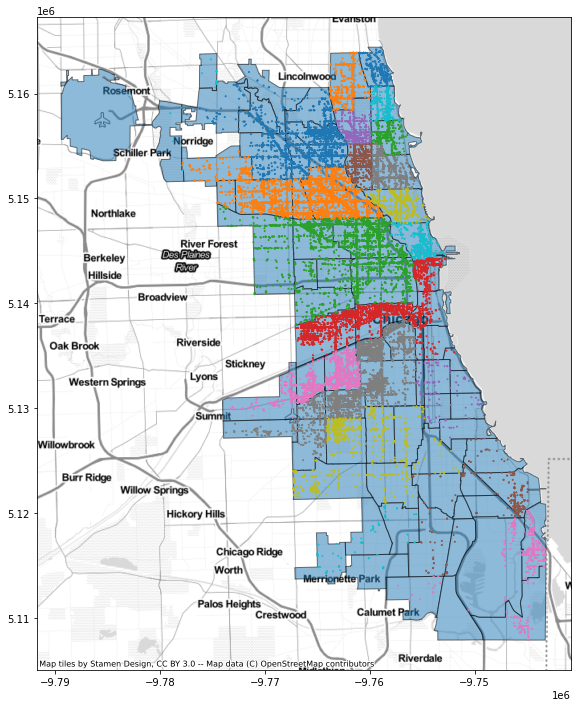

In [21]:
community_poly = community.plot(figsize = (12, 12), alpha = 0.5, edgecolor='black')
ctx.add_basemap(community_poly, source = ctx.providers.Stamen.TonerLite)
graffiti.plot(ax = community_poly, marker='o', column = 'community_area', markersize = 1);